In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [444]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("riau.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  381 non-null    datetime64[ns]
 1   Tn       380 non-null    float64       
 2   Tx       379 non-null    float64       
 3   Tavg     380 non-null    float64       
 4   RH_avg   380 non-null    float64       
 5   RR       380 non-null    float64       
 6   ss       380 non-null    float64       
 7   ff_x     380 non-null    float64       
 8   ddd_x    380 non-null    float64       
 9   ff_avg   380 non-null    float64       
 10  ddd_car  380 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 32.9+ KB


<ipython-input-444-07c0f4d2d71a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [445]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,22.2,30.8,3.5,25.7
1,2023-02-01,23.2,30.6,0.2,26.5
2,2023-03-01,23.4,30.4,10.3,25.8
3,2023-04-01,23.2,30.0,2.0,24.9
4,2023-05-01,23.0,32.6,15.2,26.8
...,...,...,...,...,...
376,2023-12-16,23.9,31.3,16.3,26.8
377,2023-12-17,24.0,31.8,0.0,27.1
378,2023-12-18,24.4,30.0,7.5,26.2
379,2023-12-19,25.2,31.3,17.5,26.5


In [446]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

53

In [447]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [448]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [449]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.2,30.8,3.5,25.7
1,31,31,2023-01-02,23.0,32.6,0.0,27.3
2,59,60,2023-01-03,23.0,28.0,3.7,24.9
3,90,92,2023-01-04,23.0,32.0,0.0,26.4
4,120,123,2023-01-05,24.0,32.4,4.7,27.2
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.9,31.3,16.3,27.8
350,350,377,2023-12-17,24.0,31.8,0.0,27.1
351,351,378,2023-12-18,24.4,30.0,7.5,26.2
352,352,379,2023-12-19,25.2,31.3,17.5,26.5


In [450]:
#cek null
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         1
Tx         2
RR         1
Tavg       1
dtype: int64

In [451]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [452]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

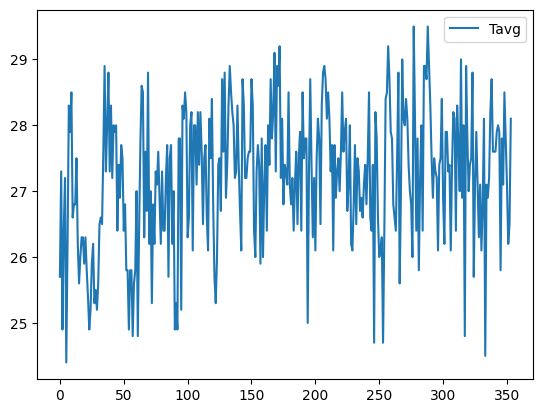

In [453]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

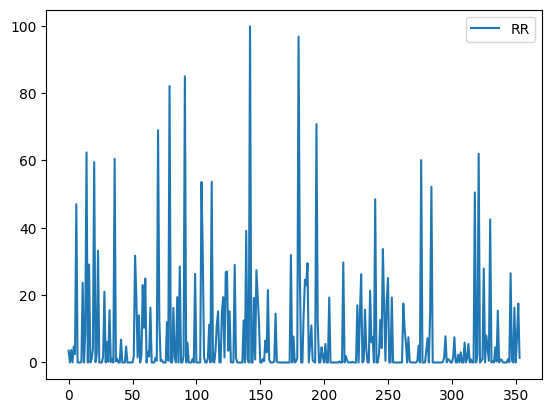

In [454]:
#plotting tavg
df1[['RR']].plot()

In [455]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.2,30.800000,3.5,25.7,32.600000,27.3,0.0
1,31,31,2023-01-02,23.0,32.600000,0.0,27.3,28.000000,24.9,3.7
2,59,60,2023-01-03,23.0,28.000000,3.7,24.9,32.000000,26.4,0.0
3,90,92,2023-01-04,23.0,32.000000,0.0,26.4,32.400000,27.2,4.7
4,120,123,2023-01-05,24.0,32.400000,4.7,27.2,26.700000,24.4,2.5
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,23.9,31.300000,16.3,27.8,31.800000,27.1,0.0
350,350,377,2023-12-17,24.0,31.800000,0.0,27.1,30.000000,26.2,7.5
351,351,378,2023-12-18,24.4,30.000000,7.5,26.2,31.300000,26.5,17.5
352,352,379,2023-12-19,25.2,31.300000,17.5,26.5,32.468466,28.1,1.4


In [456]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,3.5,25.7,27.3,0.0
1,0.0,27.3,24.9,3.7
2,3.7,24.9,26.4,0.0
3,0.0,26.4,27.2,4.7
4,4.7,27.2,24.4,2.5
...,...,...,...,...
349,16.3,27.8,27.1,0.0
350,0.0,27.1,26.2,7.5
351,7.5,26.2,26.5,17.5
352,17.5,26.5,28.1,1.4


In [457]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,3.5,25.7,27.3,0.0
1,0.0,27.3,24.9,3.7
2,3.7,24.9,26.4,0.0
3,0.0,26.4,27.2,4.7
4,4.7,27.2,24.4,2.5
...,...,...,...,...
348,0.0,28.5,27.8,16.3
349,16.3,27.8,27.1,0.0
350,0.0,27.1,26.2,7.5
351,7.5,26.2,26.5,17.5


In [458]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [459]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,3.5,25.7,27.3,0.0,0
1,0.0,27.3,24.9,3.7,1
2,3.7,24.9,26.4,0.0,2
3,0.0,26.4,27.2,4.7,3
4,4.7,27.2,24.4,2.5,4
...,...,...,...,...,...
348,0.0,28.5,27.8,16.3,348
349,16.3,27.8,27.1,0.0,349
350,0.0,27.1,26.2,7.5,350
351,7.5,26.2,26.5,17.5,351


In [460]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [461]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [462]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [463]:
X_test

,Indeks,Tavg
282,282,27.2
283,283,28.0
284,284,26.4
285,285,28.9
286,286,28.9
...,...,...
348,348,28.5
349,349,27.8
350,350,27.1
351,351,26.2


In [464]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.48791326, 27.74907737, 27.23344733, 28.04484064, 28.04707337,
       27.98457326, 28.24573737, 28.05377156, 27.86180575, 27.60510709,
       27.41314128, 27.60957255, 27.54707243, 27.52014788, 27.16314081,
       27.58613705, 27.6207362 , 27.91426674, 27.43100312, 27.20667088,
       27.75913281, 27.76136554, 27.56939973, 27.60399888, 27.18546811,
       27.60846434, 27.86962846, 27.83949477, 27.2914983 , 27.90869307,
       27.71672726, 27.49239503, 28.14195622, 27.46449406, 27.82275745,
       26.78926463, 28.11852072, 27.76472279, 27.50802413, 27.63972256,
       27.67432171, 28.09731794, 27.09619154, 27.5515542 , 27.81271832,
       27.55601966, 27.299321  , 27.56048512, 27.23905362, 27.46785131,
       27.89084754, 26.72788903, 27.57164877, 27.50914865, 27.60848065,
       27.93437762, 28.09844246, 27.74464453, 27.74687726, 27.74910999,
       27.84844199, 27.88304115, 27.85290745, 27.17544529, 27.82500649,
       27.60067425, 28.05603691, 27.83170468, 27.60737244, 27.31

In [465]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.7764944860375859 1.0632243880878414


In [466]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,27.2
283,283,28.0
284,284,26.4
285,285,28.9
286,286,28.9
...,...,...
348,348,28.5
349,349,27.8
350,350,27.1
351,351,26.2


In [467]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.487913
283,27.749077
284,27.233447
285,28.044841
286,28.047073
...,...
348,28.056037
349,27.831705
350,27.607372


In [468]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-468-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,25.7,NaN
1,27.3,NaN
2,24.9,NaN
3,26.4,NaN
4,27.2,NaN
...,...,...
348,28.5,28.056037
349,27.8,27.831705
350,27.1,27.607372
351,26.2,27.318307


<Axes: >

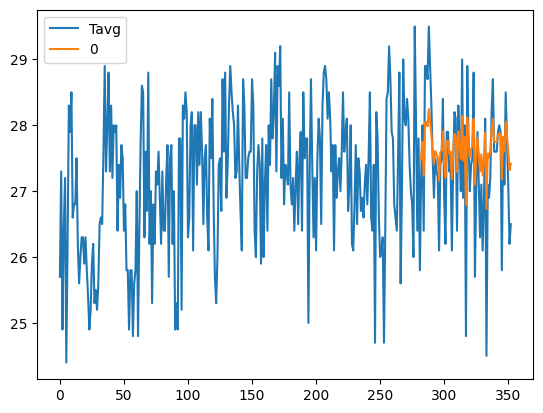

In [469]:
kan.plot()

In [470]:
new_data = [[354, 26.5],[355,26.5],[356,26.5],[357,26.5],[358,26.5],[359,26.5],[360,26.5]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.42210482, 27.42433755, 27.42657028, 27.42880301, 27.43103574,
       27.43326847, 27.43550119])

In [473]:
kan.to_json('Prediksi Riau.json')